In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
movies = pd.read_csv('movie.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
ratings = pd.read_csv('rating.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [8]:
df = ratings.merge(movies, on="movieId", how="left")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
import re
df['year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,1995.0
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995.0
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995.0
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


In [10]:
df['genres'] = df['genres'].str.split('|')
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...","[Adventure, Drama, Fantasy, Mystery, Sci-Fi]",1995.0
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995.0
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995.0


In [11]:
df.rename(columns={'timestamp':'date'}, inplace=True)
df.head()

,userId,movieId,rating,date,title,genres,year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...","[Adventure, Drama, Fantasy, Mystery, Sci-Fi]",1995.0
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995.0
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   date     object 
 4   title    object 
 5   genres   object 
 6   year     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ GB


In [13]:
df.isnull().sum()


userId       0
movieId      0
rating       0
date         0
title        0
genres       0
year       405
dtype: int64

In [16]:
df['year'].fillna(df['year'].mode()[0])
df.isnull().sum()

userId     0
movieId    0
rating     0
date       0
title      0
genres     0
year       0
dtype: int64

In [15]:
movies_df = df.copy()                 #I am Using .copy() for protects the original dataset.

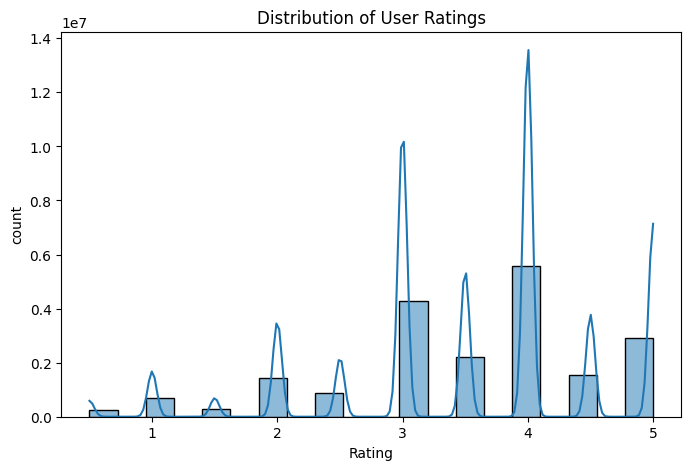

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(movies_df['rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [17]:
# The distribution shows that most movie ratings fall between 3.0 and 4.0, 
# indicating that users tend to rate movies favorably. 
# Extreme ratings (very low or very high) are relatively rare. 
# The scientific notation 1e7 on the y-axis represents counts in the scale of millions, 
# meaning the dataset contains a large number of total ratings.

In [18]:
# The dataset is too large, so I am working with a sample for genre analysis.
# I am running into a MemoryError because exploding the genres column creates a very large dataframe,it tries to allocate ~53 million rows

sample_df = movies_df.sample(400_000, random_state=42)
movies_genres = sample_df[['movieId', 'rating', 'genres']].explode('genres')

movies_genres.head()

,movieId,rating,genres
17679788,8360,3.5,Adventure
17679788,8360,3.5,Animation
17679788,8360,3.5,Children
17679788,8360,3.5,Comedy
17679788,8360,3.5,Musical


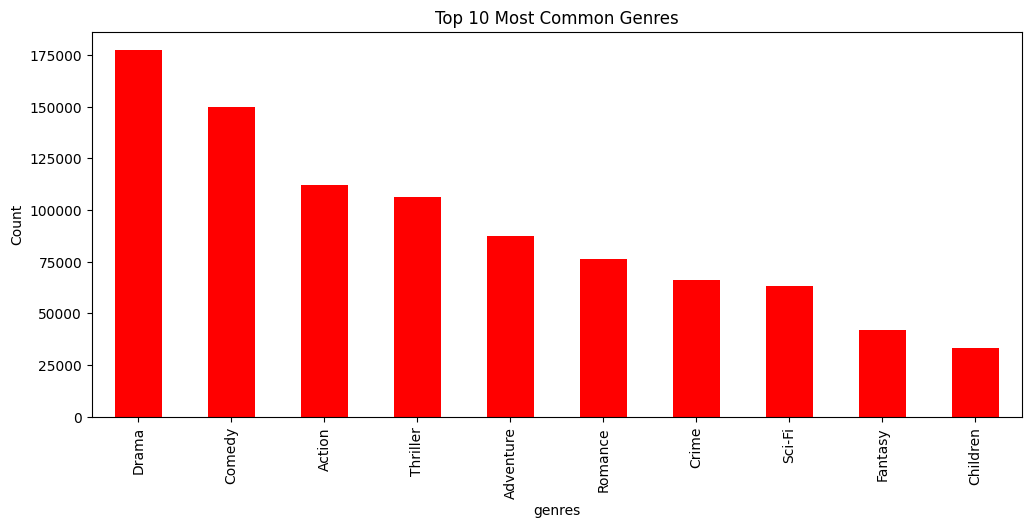

In [19]:
plt.figure(figsize=(12,5))
movies_genres['genres'].value_counts().head(10).plot(kind="bar",color = 'red')
plt.title("Top 10 Most Common Genres")
plt.ylabel("Count")
plt.show()


In [20]:
genre_ratings = movies_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)

genre_ratings.head(10)


genres
Film-Noir      3.983699
War            3.815908
Documentary    3.764737
Crime          3.679582
Drama          3.676948
Mystery        3.669854
IMAX           3.665881
Animation      3.616760
Western        3.563012
Musical        3.560036
Name: rating, dtype: float64

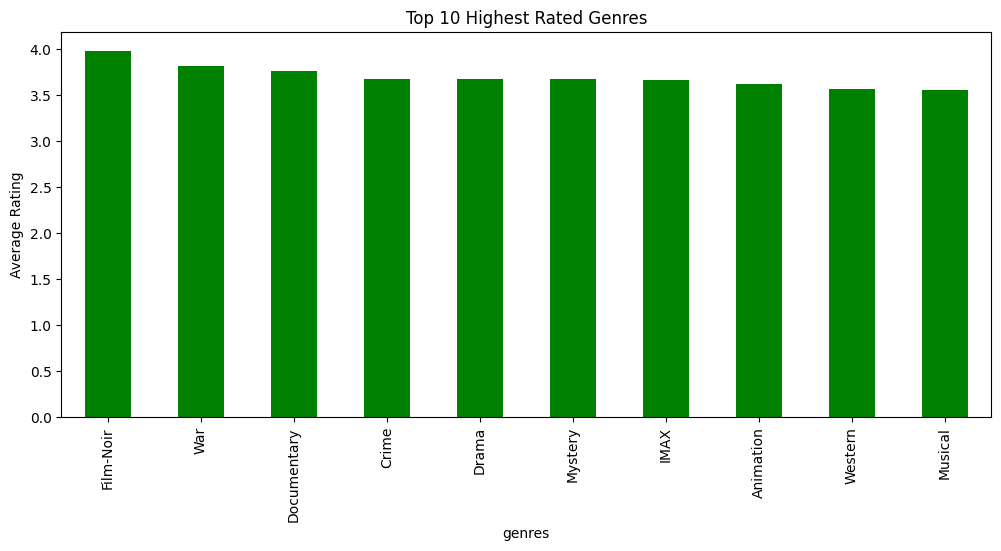

In [21]:
plt.figure(figsize=(12,5))
genre_ratings.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Highest Rated Genres")
plt.ylabel("Average Rating")
plt.show()


In [22]:
movie_stats = sample_df.groupby('title').agg({
    'rating': 'mean',
    'userId': 'count'
}).rename(columns={'userId': 'rating_count'})

filtered_movies = movie_stats[movie_stats['rating_count']>=50]

top_movies = filtered_movies.sort_values(by='rating', ascending=False).head(10)
top_movies



,rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.496828,1261
"Usual Suspects, The (1995)",4.378885,933
Double Indemnity (1944),4.357759,116
"Godfather, The (1972)",4.350059,847
Schindler's List (1993),4.315738,1023
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.308824,136
"Godfather: Part II, The (1974)",4.308608,546
"Lives of Others, The (Das leben der Anderen) (2006)",4.297414,116
"Big Sleep, The (1946)",4.295918,98


In [23]:
# Groups movies → calculates their average rating and number of ratings → removes movies with less than 50 ratings → 
# sorts them by rating → shows the top 10 highest-rated movies.

In [24]:
sample_df.head()

,userId,movieId,rating,date,title,genres,year
17679788,122270,8360,3.5,2012-04-22 01:07:04,Shrek 2 (2004),"[Adventure, Animation, Children, Comedy, Music...",2004.0
7106385,49018,32,2.0,2001-09-11 07:50:36,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0
12970708,89527,109374,3.5,2015-01-06 09:26:40,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",2014.0
15426752,106704,1060,3.0,2000-01-22 21:27:57,Swingers (1996),"[Comedy, Drama]",1996.0
6934678,47791,1732,2.0,2006-01-19 15:48:23,"Big Lebowski, The (1998)","[Comedy, Crime]",1998.0


In [25]:
rating_trend = sample_df.groupby('year')['rating'].mean().reset_index()
rating_trend.head()

,year,rating
0,1896.0,3.000000
1,1902.0,4.333333
2,1903.0,3.750000
3,1909.0,3.000000
4,1914.0,2.750000


<Axes: title={'center': 'Trend of Average Movie Ratings Over Years'}, xlabel='year'>

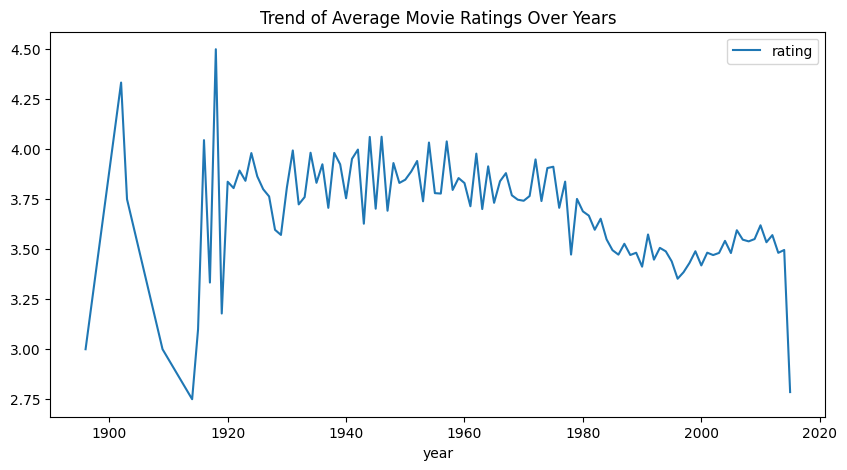

In [26]:
rating_trend.plot(x='year', y='rating', kind='line', figsize=(10,5), title='Trend of Average Movie Ratings Over Years')

<Axes: title={'center': 'Number of Ratings Per Year (Movie Popularity Trend)'}, xlabel='year'>

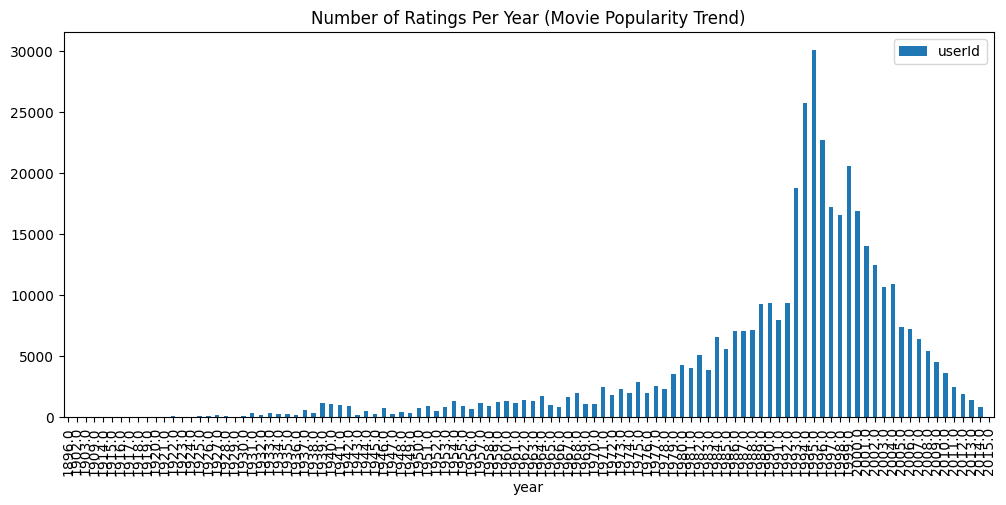

In [27]:
popularity_trend = sample_df.groupby('year')['userId'].count().reset_index()

popularity_trend.plot(x='year', y='userId', kind='bar', figsize=(12,5), title='Number of Ratings Per Year (Movie Popularity Trend)')


In [28]:
genre_year_trend = sample_df.explode('genres').groupby(['year','genres'])['rating'].mean().reset_index()
genre_year_trend.head(10)

,year,genres,rating
0,1896.0,Documentary,3.000000
1,1902.0,Action,4.333333
2,1902.0,Adventure,4.333333
3,1902.0,Fantasy,4.333333
4,1902.0,Sci-Fi,4.333333
5,1903.0,Crime,3.750000
6,1903.0,Western,3.750000
7,1909.0,Crime,3.000000
8,1909.0,Drama,3.000000
9,1914.0,Comedy,2.500000


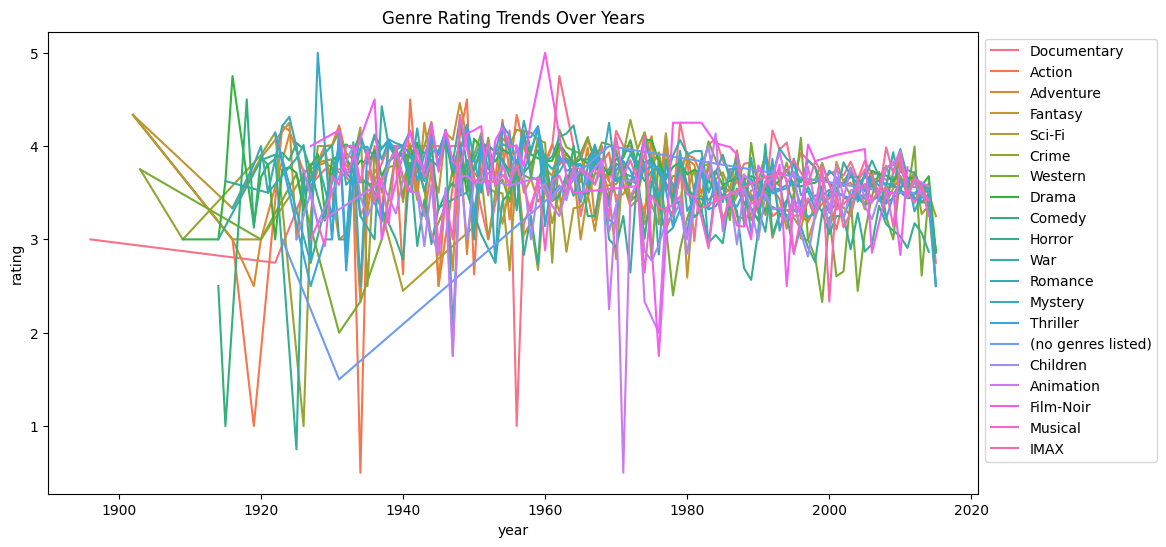

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_year_trend, x='year', y='rating', hue='genres')
plt.title("Genre Rating Trends Over Years")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [30]:
movie_year_stats = sample_df.groupby(['title', 'year'])['userId'].count().reset_index()

top_movies = movie_year_stats.sort_values(by='userId', ascending=False).head(10)
top_movies

,title,year,userId
8879,Pulp Fiction (1994),1994.0,1389
4081,Forrest Gump (1994),1994.0,1287
9956,"Silence of the Lambs, The (1991)",1991.0,1264
9849,"Shawshank Redemption, The (1994)",1994.0,1261
5991,Jurassic Park (1993),1993.0,1175
10368,Star Wars: Episode IV - A New Hope (1977),1977.0,1114
10852,Terminator 2: Judgment Day (1991),1991.0,1107
7132,"Matrix, The (1999)",1999.0,1086
1651,Braveheart (1995),1995.0,1030
9630,Schindler's List (1993),1993.0,1023


In [31]:
sample_df.head()

,userId,movieId,rating,date,title,genres,year
17679788,122270,8360,3.5,2012-04-22 01:07:04,Shrek 2 (2004),"[Adventure, Animation, Children, Comedy, Music...",2004.0
7106385,49018,32,2.0,2001-09-11 07:50:36,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0
12970708,89527,109374,3.5,2015-01-06 09:26:40,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",2014.0
15426752,106704,1060,3.0,2000-01-22 21:27:57,Swingers (1996),"[Comedy, Drama]",1996.0
6934678,47791,1732,2.0,2006-01-19 15:48:23,"Big Lebowski, The (1998)","[Comedy, Crime]",1998.0


In [49]:
mr_df = sample_df[['userId', 'movieId', 'rating']].copy()

In [50]:
mr_df['userId'] = mr_df['userId'].astype('category').cat.codes
mr_df['movieId'] = mr_df['movieId'].astype('category').cat.codes

mr_df.head()

,userId,movieId,rating
17679788,87938,6809,3.5
7106385,35270,31,2.0
12970708,64366,12084,3.5
15426752,76718,981,3.0
6934678,34378,1558,2.0


In [51]:
from sklearn.model_selection import train_test_split

x = mr_df[['userId', 'movieId']]
y = mr_df['rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred = lm.predict(x_test)


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📌 Model Evaluation Results")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


📌 Model Evaluation Results
RMSE: 1.0540940457331724
MAE: 0.8420110436343979
R2 Score: 0.00024800373574662693


In [55]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

ridge_pred = ridge_model.predict(x_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge RMSE:", rmse_ridge)


Ridge RMSE: 1.0540940457331727


In [56]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train, y_train)

lasso_pred = lasso_model.predict(x_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Lasso RMSE:", rmse_lasso)


Lasso RMSE: 1.0540940473418565


In [57]:
models = {
    "Linear Regression": rmse,
    "Ridge Regression": rmse_ridge,
    "Lasso Regression": rmse_lasso
}

models




{'Linear Regression': 1.0540940457331724,
 'Ridge Regression': 1.0540940457331727,
 'Lasso Regression': 1.0540940473418565}

In [58]:
#All three models show almost identical performance.
#This indicates the dataset is simple, the features are not highly correlated, and regularization does not significantly improve model performance.
# let’s upgrade movie rating prediction model with feature engineering + better ML pipeline

In [59]:
# Feature Engineering

# Average rating per movie
sample_df['movie_avg_rating'] = sample_df.groupby('movieId')['rating'].transform('mean')

# Average rating per user
sample_df['user_avg_rating'] = sample_df.groupby('userId')['rating'].transform('mean')

# Rating count per movie
sample_df['movie_rating_count'] = sample_df.groupby('movieId')['rating'].transform('count')

# Rating count per user
sample_df['user_rating_count'] = sample_df.groupby('userId')['rating'].transform('count')




In [60]:
from sklearn.model_selection import train_test_split

features = [
    'userId', 'movieId',
    'movie_avg_rating', 'user_avg_rating',
    'movie_rating_count', 'user_rating_count'
]

X = sample_df[features]
y = sample_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_train.loc[:, ['userId','movieId']] = encoder.fit_transform(
    X_train[['userId','movieId']]
)

X_test.loc[:, ['userId','movieId']] = encoder.transform(
    X_test[['userId','movieId']]
)



In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = rmse


In [63]:
results


{'Linear Regression': 0.7546256717824902,
 'Ridge Regression': 0.7546256943450338,
 'Lasso Regression': 0.7546394173818821}